In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

import astropy.units as u
import astropy.constants as const

from sherpa.models import model
from sherpa.models.parameter import Parameter, tinyval
from sherpa.models import ArithmeticModel, modelCacher1d, CompositeModel, ArithmeticFunctionModel, RegriddableModel1D
from sherpa.models.basic import clean_kwargs1d
from sherpa.utils.guess import get_position, guess_amplitude, guess_amplitude_at_ref, guess_amplitude2d, guess_bounds, guess_fwhm, guess_position, guess_reference, param_apply_limits, _guess_ampl_scale
from sherpa.models import _modelfcts as _basic_modelfuncs
from sherpa.astro.models import _modelfcts as _astro_modelfuncs
from sherpa.astro.models import Lorentz1D

from fantasy_agn.tools import make_spec
import fantasy_agn.models as FantasyModels

In [3]:
from MyPyToolbox.renderHTML import renderHTML
renderHTML()

In [4]:
from MyPyToolbox.myfantasy.models import *

In [5]:
path_to_folder='testfit/'
FantasyModels.create_input_folder(xmin=4000, xmax=8000, path_to_folder=path_to_folder)
set_path(path_to_folder)

Directory  testfit/  already exists


In [6]:
# Create a model
m = create_line(name='line', pos=4861, ampl=5, fwhm=1000, offset=1000)
m

<GaussEmLine model instance 'line'>

In [7]:
m_lorentz = create_line(name='line', pos=4861, ampl=100, fwhm=1000, offset=1000, profile='lorentz')
m_lorentz

<LorentzEmLine model instance 'line'>

In [8]:
m_voigt = create_voigt_line(name='line', pos=4861, ampl=100, fwhm_g=1000, fwhm_l=1500, offset=1000)
m_voigt

<VoigtEmLine model instance 'line'>

In [14]:
fixed_ori = FantasyModels.create_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm=4650, min_fwhm=500, max_fwhm=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=1, min_amplitude=0, max_amplitude=1000)
fixed_ori

<Fixed_Lines model instance 'Test'>

In [15]:
my_fixed = create_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm=4650, min_fwhm=500, max_fwhm=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=10, min_amplitude=0, max_amplitude=1000,
                                         profile='lorentz')
my_fixed

<Fixed_Lines model instance 'Test'>

In [26]:
my_voigt = create_voigt_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm_g=200, min_fwhm_g=10, max_fwhm_g=8000,
                                         fwhm_l=6345, min_fwhm_l=500, max_fwhm_l=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=10, min_amplitude=0, max_amplitude=1000)
my_voigt

<Fixed_Lines model instance 'Test'>

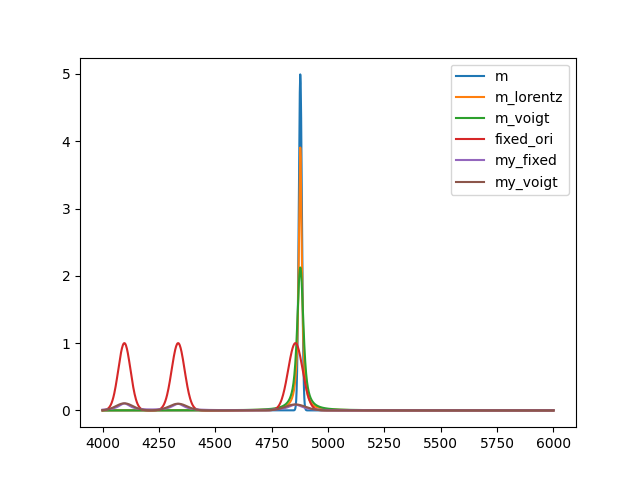

In [27]:
# Dummy data
wave = np.linspace(4000, 6000, 1000)

plt.figure()

plt.plot(wave, m(wave), label='m')
plt.plot(wave, m_lorentz(wave), label='m_lorentz')
plt.plot(wave, m_voigt(wave), label='m_voigt')

plt.plot(wave, fixed_ori(wave), label='fixed_ori')
plt.plot(wave, my_fixed(wave), label='my_fixed')
plt.plot(wave, my_voigt(wave), label='my_voigt')

plt.legend()
plt.show()